<div style="border:solid green 2px; padding: 20px"> 
    
Hello Yosef, 
    
    
my name is Aleksandra. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v1</b> <a class="tocSkip"></a>
    
Yosef, thanks a lot for the project! Great job! Everything is perfect. I can see that a lot of efforts have been made, and it turned out to be very strong. You work very carefully with data and you make qualitative assumptions - like a real analyst. 
    
Let's make your work even greater:
    
- find out, when do people start buying (time between registration and conversion)
- how many orders do they make
- the average purchase size
- enrich the project with plots
    
I left guidance ones as we went along. Will look forward for your work!

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Yosef, thanks again for the project! Everything is perfect now. There are no critical comments. Good luck at next steps!

# Project description

In my porject my first task is to help optimize marketing expenses, in a company that I've been offered an internship in the analytical department at Yandex.Afisha.

# Loading that data

In [1]:
import pandas as pd

In [2]:
visits_log = pd.read_csv('/datasets/visits_log_us.csv')
orders_log = pd.read_csv('/datasets/orders_log_us.csv')
costs_log = pd.read_csv('/datasets/costs_us.csv')

In [3]:
print(visits_log.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [4]:
print(orders_log.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [5]:
print(costs_log.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


# Preparation before analayz
In this this section I will prepare the data before analayzing it.
I'll work with the next checklist:

1)Changing data type

2)Checking missing values

3)Checknig and droping duplicates

4)Make the file lighter so I can work with it easily.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
    
Correct, let's do it!

# Changing data type

In [6]:
visits_log['Start Ts'] = pd.to_datetime(visits_log['Start Ts'],  format='%Y-%m-%d %H:%M:%S')
visits_log['End Ts'] = pd.to_datetime(visits_log['End Ts'],  format='%Y-%m-%d %H:%M:%S')

In [7]:
orders_log['Buy Ts'] = pd.to_datetime(orders_log['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

In [8]:
costs_log['dt'] = pd.to_datetime(costs_log['dt'], format='%Y-%m-%d %H:%M:%S')

# Checking for missing values

In [9]:
visits_log.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [10]:
orders_log.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [11]:
costs_log.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

There are no missing values.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
    
Right

# Checknig and droping duplicates

In [12]:
visits_log.duplicated().sum()

0

In [13]:
orders_log.duplicated().sum()

0

In [14]:
costs_log.duplicated().sum()

0

There are no duplicates

# Optimizing the file and make the file lighter

In [15]:
visits_log['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

It seem that there are only two values in this column therefore they can be change to some other data type like 'category'

In [16]:
visits_log['Device'] = visits_log['Device'].astype('category')

In [17]:
visits_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Good! Indeed the file weight less then before!

First mission accomplished!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Well done!

#  Making a report and calculate metrics

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>

<s>Let's also check how many people use it every day, week, and month

visit_pivot and cohort month shows the number of visits per week and month for the period

Let's check the session per day/week/month

In [18]:
import numpy as np

In [19]:
visits_log['Start Ts_date'] = visits_log['Start Ts'].dt.date

In [20]:
first_session_by_id = visits_log.groupby('Uid')['Start Ts_date'].min()
first_session_by_id.name = 'first_session'
visits_log = visits_log.join(first_session_by_id, on='Uid')
visits_log['first_session_month'] = visits_log['first_session'].astype('datetime64[M]')
visits_log['session_month'] = visits_log['Start Ts_date'].astype('datetime64[M]')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Dataframes usually contain data for several years. It is important to choose the correct method for drawing a month, otherwise the months of different years can become one month. Great that you use the  astype('datetime64[M]') method. You do not need to call pd.DatetimeIndex

In [21]:
cohorts_month = visits_log.pivot_table(index='first_session_month', columns='session_month', values='Uid', aggfunc='count')

In [22]:
visits_log['session_week'] = pd.to_datetime(visits_log['Start Ts_date']) - pd.to_timedelta(visits_log['Start Ts_date'].astype('datetime64').dt.dayofweek, unit='d')
visits_log['first_session_week'] = pd.to_datetime(visits_log['first_session']) - pd.to_timedelta(visits_log['first_session'].astype('datetime64').dt.dayofweek, unit='d')

In [23]:
visits_log['cohort_lifetime'] = (
    visits_log['session_week'] - visits_log['first_session_week']
) / np.timedelta64(1,'W')
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].astype(int)

visits_log['cohort_lifetime_month'] = (
    visits_log['session_month'] - visits_log['first_session_month']
) / np.timedelta64(1,'M')
visits_log['cohort_lifetime_month'] = visits_log['cohort_lifetime_month'].astype(int)

In [24]:
cohorts = (
    visits_log.groupby(['first_session_week', 'cohort_lifetime']).agg({'Uid': 'count'})
    .reset_index()
)
initial_users = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_week', 'Uid']]
initial_users = initial_users.rename(
    columns={'Uid': 'cohorts_visits'}
)

In [25]:
visits_log = visits_log.merge(initial_users, on='first_session_week')

In [26]:
visits_pivot = visits_log.pivot_table(index='first_session_week', columns='cohort_lifetime', values='Uid', aggfunc='count')
visits_pivot.fillna('',inplace=True)
visits_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
first_session_week,,,,,,,,,,,,,,,,,,,,,
2017-05-29,2309.0,454,241,194,212,223,239,194,120,101,...,118,142,139,167,203,92,152,175,148,128
2017-06-05,4477.0,215,168,144,151,155,129,103,97,115,...,116,126,131,113,86,73,150,112,105,
2017-06-12,2758.0,133,84,82,99,85,55,67,37,61,...,72,48,37,31,33,36,50,31,,
2017-06-19,2778.0,124,74,76,68,45,39,26,32,40,...,43,33,28,18,32,34,26,,,
2017-06-26,2950.0,152,102,85,61,53,41,44,61,67,...,21,16,27,29,34,31,,,,
2017-07-03,3140.0,187,101,75,51,56,51,42,47,57,...,15,17,29,19,28,,,,,
2017-07-10,4247.0,190,102,74,59,55,57,51,65,55,...,41,48,50,44,,,,,,
2017-07-17,3722.0,154,99,60,62,73,70,94,88,77,...,32,34,25,,,,,,,
2017-07-24,2357.0,71,49,48,37,51,56,38,44,36,...,14,12,,,,,,,,


This shows visits per week:
There is a dramatic fall down in the number of visitors after the first month they visits.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> Nicely done

In [27]:
initial_visitors = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_week', 'Uid']]
initial_visitors = initial_visitors.rename(columns={'Uid' :'cohorts_users'})
cohorts = cohorts.merge(initial_visitors, on='first_session_week')

In [28]:
cohorts['retention'] = (cohorts['Uid'] / cohorts['cohorts_users'])*100
cohorts

,first_session_week,cohort_lifetime,Uid,cohorts_users,retention
0,2017-05-29,0,2309,2309,100.000000
1,2017-05-29,1,454,2309,19.662191
2,2017-05-29,2,241,2309,10.437419
3,2017-05-29,3,194,2309,8.401906
4,2017-05-29,4,212,2309,9.181464
...,...,...,...,...,...
1426,2018-05-14,1,172,3662,4.696887
1427,2018-05-14,2,86,3662,2.348443
1428,2018-05-21,0,3604,3604,100.000000
1429,2018-05-21,1,131,3604,3.634850


In [29]:
retention_pivot = cohorts.pivot_table(index='first_session_week', columns='cohort_lifetime', values='retention', aggfunc='sum')

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

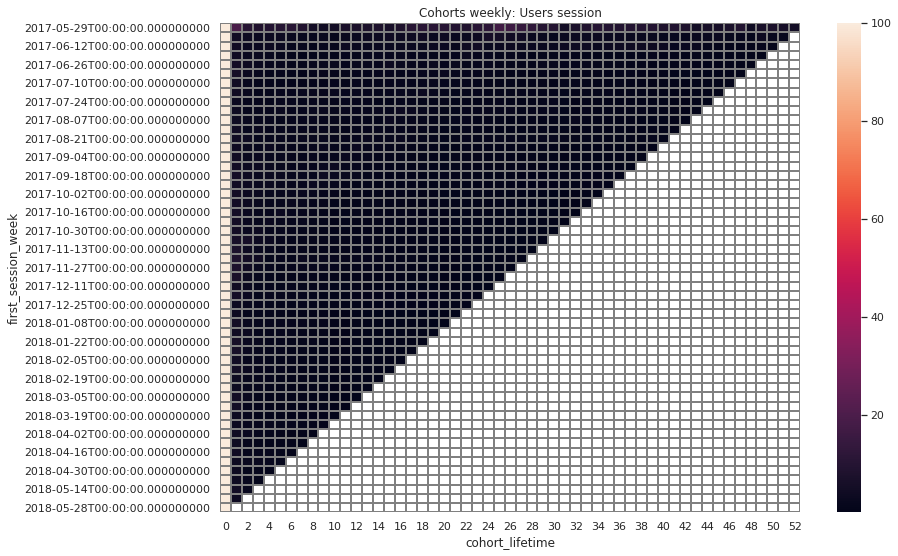

In [31]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohorts weekly: Users session')
sns.heatmap(retention_pivot, annot=False, fmt='.1%', linewidths=1, linecolor='gray')

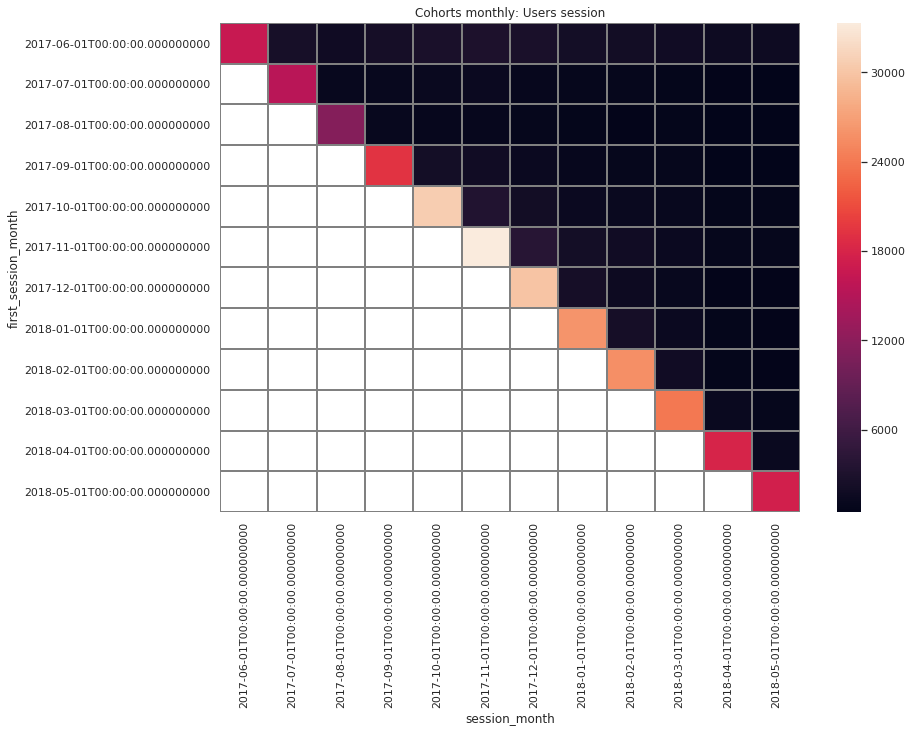

In [32]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohorts monthly: Users session')
sns.heatmap(cohorts_month, annot=False, fmt='.1%', linewidths=1, linecolor='gray')

This shows the visits per month:
From the cohorts analyzing i can tell that most of the users that have been visits are not coming one month after the first visit.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> You are absolutely right!

In [33]:
visits_log['visit_duration'] = (pd.to_datetime(visits_log['End Ts']) - pd.to_datetime(visits_log['Start Ts_date'])).dt.seconds
visits_log.groupby('session_month').agg({'visit_duration': 'sum'}).reset_index()

,session_month,visit_duration
0,2017-06-01,888712358
1,2017-07-01,952988675
2,2017-08-01,766440043
3,2017-09-01,1291396352
4,2017-10-01,2056236006
5,2017-11-01,2403209699
6,2017-12-01,2271532795
7,2018-01-01,2018650109
8,2018-02-01,2016944622
9,2018-03-01,1934267677


In [34]:
visits_log['visit_duration'].mean()

54175.94438508625

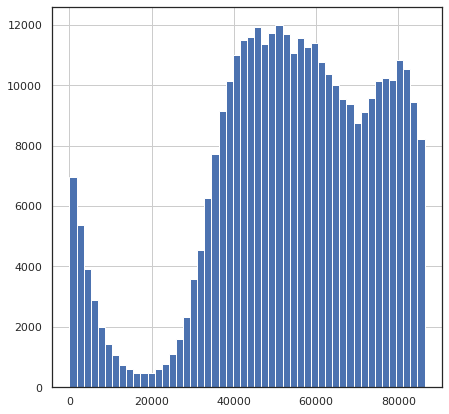

In [35]:
visits_log['visit_duration'].hist(bins=50,figsize=(7,7));

In [36]:
visits_log['visit_duration'].mode()

0    48360
1    50700
dtype: int64

Users loggin for more time duration at the end of the cohorts period which man thay using the app more then when they start using it.

In [37]:
visits_log['session_day'] = visits_log['Start Ts_date'].astype('datetime64[M]').dt.dayofweek
visits_log.groupby('session_day').agg({'Uid': 'count'})
daily_cohorts = visits_log.pivot_table(index='first_session_week', columns='session_day' , values='Uid', aggfunc='count')

In [38]:
daily_cohorts.fillna('')

session_day,0,1,2,3,4,5,6
first_session_week,,,,,,,
2017-05-29,837,1340.0,1297,5034,1971,834,1724
2017-06-05,600,1008.0,801,6009,1393,583,1230
2017-06-12,408,446.0,400,3766,739,338,611
2017-06-19,186,289.0,251,3179,452,300,400
2017-06-26,245,374.0,287,2676,510,1052,425
2017-07-03,170,327.0,321,359,494,3514,413
2017-07-10,276,478.0,407,497,579,4552,489
2017-07-17,272,447.0,392,497,666,3899,507
2017-07-24,123,286.0,163,268,334,2379,282


This are the visits per they during every week of the time period,
at '2017-12-04' there's a signifcalt climbing in the numbers of visits per day.
now that intresting maybe it becasue of the holydays.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Well done

# Sales and revenue analyzing

In [39]:
orders_log['order_date'] = orders_log['Buy Ts'].astype('datetime64[M]').dt.date
order_first_month = orders_log.groupby('Uid').agg({'order_date': 'min'})
order_first_month.columns = ['order_first_month']
orders_log = orders_log.merge(order_first_month, on='Uid')

In [40]:
orders_log['cohorts_lifetime'] = (orders_log['order_date'] - orders_log['order_first_month'])/ np.timedelta64(1,'M')
orders_log['cohorts_lifetime'] = orders_log['cohorts_lifetime'].astype(int)

In [41]:
cohorts = (
    orders_log.groupby(['order_first_month', 'cohorts_lifetime']).agg({'Uid': 'nunique'})
    .reset_index()
)
initial_order_cohort = cohorts[cohorts['cohorts_lifetime'] == 0][['order_first_month', 'Uid']]
initial_order_cohort = initial_order_cohort.rename(columns={'Uid': 'n_first_orders'})
orders_log = orders_log.merge(initial_order_cohort, on='order_first_month')

In [42]:
revenue_pivot = orders_log.pivot_table(index='order_first_month', columns='cohorts_lifetime', values='Revenue', aggfunc='sum')
revenue_pivot.fillna('',inplace=True)
revenue_pivot

cohorts_lifetime,0,1,2,3,4,5,6,7,8,9,10
order_first_month,,,,,,,,,,,
2017-06-01,10539.31,,885.34,1931.3,2068.58,1487.92,1922.74,1176.56,2344.66,1155.66,519.62
2017-07-01,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,582.77,,582.32,
2017-08-01,7228.83,646.63,628.12,536.05,676.85,388.45,843.47,400.33,257.53,,
2017-09-01,17453.02,,11606,,1033.84,3480.93,627.57,474.92,,,
2017-10-01,21716.20,2325.21,830.65,682.01,1180.14,368.1,501.14,,,,
2017-11-01,22665.53,,814.39,1930.17,219.88,469.02,,,,,
2017-12-01,20767.49,1141.22,8723.8,1371.57,1481.66,,,,,,
2018-01-01,13949.50,2020.56,481.59,211.48,,,,,,,
2018-02-01,16193.14,286.66,270.7,,,,,,,,


According to the data the company has suffer decrease in the revenue by the end of the period.

In [43]:
n_buyers = orders_log.groupby('order_first_month').agg({'Uid':'nunique'})
n_buyers = n_buyers.rename(columns={'Uid':'n_buyers'})
orders_log = orders_log.join(n_buyers, on='order_first_month')

In [44]:
orders_log['ltv'] = orders_log['Revenue'] / orders_log['n_buyers']

In [45]:
orders_log['age'] = (
    orders_log['order_date'] - orders_log['order_first_month']
)/ np.timedelta64(1,'M')
orders_log['age'] = orders_log['age'].round().astype(int)

In [46]:
ltv_pivot = orders_log.pivot_table(index='order_first_month', columns='age', values='ltv', aggfunc='mean')
ltv_pivot.fillna('', inplace=True)
ltv_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
order_first_month,,,,,,,,,,,,
2017-06-01,0.002007,0.00274197,0.00251516,0.00422421,0.00350182,0.00337386,0.00344362,0.00334248,0.0026095,0.0039594,0.00595063,0.0029867
2017-07-01,0.002749,0.00335211,0.00519609,0.00345169,0.00245544,0.00190302,0.00197062,0.0028364,0.00277987,0.00613105,0.00293723,
2017-08-01,0.003442,0.0043703,0.00458482,0.00483058,0.00581237,0.00457323,0.00429927,0.0051924,0.00635243,0.00408648,,
2017-09-01,0.001924,0.00510313,0.00323559,0.0242426,0.00597848,0.00593639,0.00649637,0.00434196,0.0030165,,,
2017-10-01,0.001008,0.00170625,0.00118144,0.00128808,0.00117488,0.00116856,0.000986229,0.00092376,,,,
2017-11-01,0.001071,0.00100562,0.00109646,0.00154006,0.00108833,0.000913203,0.00112674,,,,,
2017-12-01,0.000938,0.000964349,0.00457969,0.00595126,0.00363872,0.0032195,,,,,,
2018-01-01,0.001093,0.00131589,0.00191372,0.00223091,0.000803819,,,,,,,
2018-02-01,0.001015,0.00125349,0.00094597,0.0010592,,,,,,,,


There's another trend!! Every user paid at the current month they visit more then from the the month before they bought for the first time. Maybe the price was higher and that explained why the costumer doesnt visit one month after their first visits and why the company doesnt grow and become protifable. More over from the report i made from before my finding shows that users spend more time on app but seldom make a purhcase.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b> 

<s>We also need to know exact:
    
- When do people start buying (time between registration and conversion)
- How many orders do they make
- The average purchase size


Let's find out exact numbers!

In [47]:
converted_time = orders_log.merge(visits_log, on='Uid')

In [74]:
converted_time['converted_time'] = converted_time['Buy Ts'] - converted_time['Start Ts']
converted_time[['Uid', 'converted_time']]

,Uid,converted_time
0,10329302124590727494,0 days 00:01:00
1,11627257723692907447,0 days 00:11:00
2,17903680561304213844,0 days 00:02:00
3,16109239769442553005,0 days 00:15:00
4,14200605875248379450,0 days 00:27:00
...,...,...
761802,3993697860786194247,136 days 13:17:00
761803,3993697860786194247,170 days 07:36:00
761804,3993697860786194247,220 days 11:24:00
761805,3993697860786194247,197 days 06:48:00


In [75]:
converted_time['converted_time'].mean()

Timedelta('-4 days +15:04:05.119958')

The avrage convert time is -4days which mean they visit after they buying.
Maybe they purchase by phone i guess.

In [76]:
converted_time['converted_time'].mode()

0   00:01:00
dtype: timedelta64[ns]

The most common time for purchasing is 1 minute, most of the visitors making a purchase 1 minute after they visit.
It seem they allready were sure they are going to buy and were motivated towrd buying.

In [78]:
converted_time['converted_time']

convert_time_pivot = converted_time.pivot_table(index='Uid', values='Revenue',aggfunc='count')
convert_time_pivot

,Revenue
Uid,
313578113262317,3
1575281904278712,4
2429014661409475,1
2464366381792757,2
2551852515556206,4
...,...
18445147675727495770,1
18445407535914413204,9
18445601152732270159,3


This are the number of purchases for each visitor.

In [80]:
convert_time_pivot['Revenue'].mean().round()

21.0

Every visitor make 21 purchases by avarage.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> Great!

# Marketing analyazing

In [50]:
costs_log.agg({'costs':'sum'})

costs    329131.62
dtype: float64

This are the total expenses.

In [81]:
costs_log.groupby(['dt', 'source_id']).agg({'costs':'sum'})

costs
dt         source_id        
2017-06-01 1           75.20
           2          132.56
           3          349.38
           4           76.74
           5           73.24
...                      ...
2018-05-31 3          822.30
           4          492.54
           5          398.04
           9           27.37
           10          17.60

[2542 rows x 1 columns]

In [98]:
cost_pivot = costs_log.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum')
cost_pivot

source_id,1,2,3,4,5,9,10
dt,,,,,,,
2017-06-01,75.20,132.56,349.38,76.74,73.24,13.06,15.08
2017-06-02,62.25,132.38,314.22,59.21,123.82,18.13,11.18
2017-06-03,36.53,77.20,196.12,59.39,64.93,7.06,9.62
2017-06-04,55.00,79.08,389.87,161.97,52.77,4.65,17.82
2017-06-05,57.08,108.96,424.47,44.65,144.30,15.30,26.68
...,...,...,...,...,...,...,...
2018-05-27,30.89,113.35,254.90,28.04,84.66,11.11,9.92
2018-05-28,54.47,82.67,247.92,68.88,131.77,12.47,21.26
2018-05-29,61.13,105.75,347.59,103.84,138.33,16.83,11.32


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Well done!

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment v1</b>  We should also plot how these metrics differ for various devices and ad sources and how they change in time. Could you please do this?

Revenue from each source

In [53]:
initial_cost = costs_log.groupby('source_id').agg({'dt':'min'})
initial_cost.columns = ['first_purchase']
costs_log = costs_log.join(initial_cost, on='source_id')

In [54]:
costs_log['cohorts_lifetime'] = ((costs_log['dt'] - costs_log['first_purchase'])/np.timedelta64(1,'M')).astype(int)
costs_pivot = costs_log.pivot_table(index='first_purchase', columns='cohorts_lifetime', values='costs', aggfunc='sum')
costs_pivot

cohorts_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase,,,,,,,,,,,,
2017-06-01,18393.04,17862.55,14790.54,24368.91,36322.88,37907.88,38315.35,32590.82,35088.01,28977.99,22886.44,21627.21


There was a slight decreas in marketing investment after the 0th cohort but afte the 4th there was a increase.

In [101]:
source_pivot = costs_log.pivot_table(index='source_id', columns='cohorts_lifetime', values='costs', aggfunc='sum')

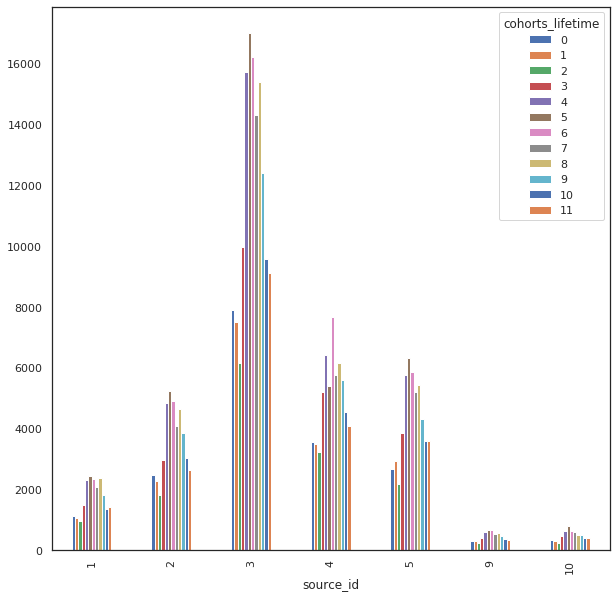

In [104]:
source_pivot.plot(kind='bar', figsize=(10,10))

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> Well done

Source 3 attract the most audience.

In [55]:
ROI = (orders_log.groupby('cohorts_lifetime')['Revenue'].sum() - costs_log.groupby('cohorts_lifetime')['costs'].sum())/ costs_log.groupby('cohorts_lifetime')['costs'].sum()

In [56]:
ROI

cohorts_lifetime
0     9.053039
1    -0.544973
2     0.795374
3    -0.698268
4    -0.807259
5    -0.828677
6    -0.892313
7    -0.919162
8    -0.925838
9    -0.940024
10   -0.977296
11         NaN
dtype: float64

The ROI shows that there is a profit in the first cohort but after that the company lost every month except one.

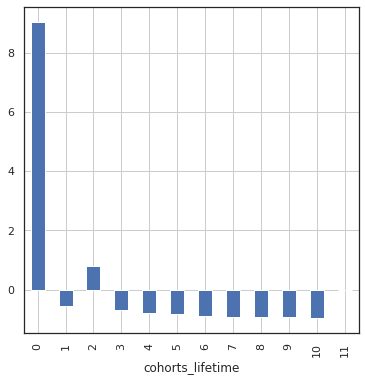

In [57]:
ROI.plot(kind='bar', grid=True, figsize=(6,6));

In [58]:
CAC = costs_log.groupby('cohorts_lifetime')['costs'].sum() / orders_log.groupby('cohorts_lifetime')['Uid'].nunique()

In [59]:
CAC

cohorts_lifetime
0       0.503602
1      22.525284
2      16.942199
3      46.505553
4      73.977352
5     101.902903
6     140.349267
7     181.060111
8     310.513363
9     333.080345
10    431.819623
11           NaN
dtype: float64

In [60]:
orders_log.groupby('cohorts_lifetime')['ltv'].sum() / CAC

cohorts_lifetime
0     129.534730
1       0.114617
2       0.527097
3       0.058287
4       0.037279
5       0.026727
6       0.014570
7       0.007516
8       0.004338
9       0.002624
10      0.000595
11           NaN
dtype: float64

Most of the month in the data shows that the cac is greater then the ltv thus the company suffer losses. 

# The solution i suggest 

What we got this far - users spend alot of time during the last cohorts but most of them dont purchase anything. But the one who buy are buying in a higher price from before which is why i think the company misscalculate the way the company should charg for the service.
Furthermore the company loss lot of its revenues this why it should consider using cut on marketing because uses arent realy attracted by them. Maybe even lowering the price will benefit the company by making the first visits of vistors more protiable.Then the company can rais the charg for higher price for the second time the users buying and make the purchase anualy.

In [61]:
visits_log['session_date'] = pd.to_datetime(visits_log['Start Ts_date']).dt.date
DAU = visits_log.groupby('session_date').agg({'Uid':'nunique'}).mean()['Uid']
DAU

907.9917582417582

In [62]:
visits_log['session_year'] = pd.to_datetime(visits_log['Start Ts_date']).dt.year
MAU = visits_log.groupby(['session_year', 'session_month']).agg({'Uid':'nunique'}).mean()['Uid']
MAU

23228.416666666668

In [63]:
sitcky_factor = DAU / MAU
sitcky_factor

0.03908969652437603

The audience is not so loyal to the service which is why the company need to invest in making the users stay after they attracted in the first place. Because a many users are attracted acording to the analysis but after the first visit most of them dont come back.
Maybe it could be wise to push more ad from the app.

In [64]:
visits_log['visit_duration'].mode().median()

49530.0

The common users spend on the app is allmost 14 hours which is crazy cause they are not buying enough.
Therefor the focus should be on them because they are the potential for making in the ROI climb by making them use the serivce casue they are not willing to pay the extra chash for buying.

In [65]:
conversion_rate = orders_log.groupby('cohorts_lifetime').agg({'Uid':'nunique'}) / visits_log.groupby('cohort_lifetime_month').agg({'Uid':'nunique'}) 

In [66]:
conversion_rate

,Uid
cohorts_lifetime,
0,0.160070
1,0.094069
2,0.092518
3,0.088126
4,0.089435
5,0.087038
6,0.090758
7,0.075000
8,0.081943


Not big surprise. The conversion rate is very low which indecet the fact that most of the visitors doesnt making a purhcase. Thus the service need to make some adjustment:

1)Making the vistors a active buying costumer is the main goal.

2)Invest less on marketing and more on making the current costumer make a purchase, buy lowering price for example or making a sale.

3)Make the audience which been atracted come back more offten.

4)Make less expenses and more profits, by cut the marketing and investing just in the source where the users are most attracted from that can save some money and make the ROI value climbe up.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> Your thoughts are correct

# Conclusion

My finding shows that the service not profitable and my suggestion are above.
In the project I:

1)Loaded the data.

2)Prepered it to analyze by:

  a) check if there are missing values.
  
  b) chaeck for duplicates.
  
  c) optimizing the data by changing types and reduce overall file size.
  
3)Making a report and calculate metrics.

4)Made a few additional info the the data like 'cohort_liftme' columns to make groups so i can track the change by time.

5)Plot a heatmap using sns to see how the change of the visited user was, whethere it was positive or negetive. It help to see the trend of visiting users.

6)Plot histogram to check the frequency of visits duration.

7)Analayzed the sale and revenue the same way I did before (like in '3') and calculate the LTV.

8)Analyzed the marketing by calculating the ROI and CAC.

9)I used this matrics an assess the user activity to get a general picture of how the company is being conducted financially, in order to find out what is the best for them to focus on and what they should neglect in order to be more profitable.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Thanks for the final conclusion! You conducted great research.